# Linear Regression using Gradient Descent

In this exercise we'll try to build a Linear Regression (LR) model that predicts the cost of our stationary purchase.

Imagine that you want to buy a pen and some refills for it, the pen costs 10 Rupees and refill costs 5 Rupees each, you have to buy only 1 pen and you can choose the number of refills.
Therefore the formula of cost becomes : cost = (cost of a single refill)(no of refills) + (cost of a pen)(number of pens),
                                             = (           5           )(no of refills) + (      10     )(       1      )
                                             = 5(no of refills) + 10

We can see that the above equation for cost is similar to equation of a line -> y = mx + b
Where y = cost, m = 5, x = number of refills and b = 10.
We know the value for m and b but the LR model doesn't.
To train the LR model we will provide it different values of y and x and let it estimate the value for m and b.
In Deep Learning terminology m and b are reffered to weight and bias respectively.

So on a broad scale what LR model does is it tries to estimate a line that would be able to approximate the data points as accurately as possible.
Thus the name Linear Regression.

Let's see if we can Create and Train an LR model to estimate the weights and bias.

## Creating Dummy Dataset

In [1]:
# numpy is the library used for numerical calculations and handling arrays
import numpy as np

In [2]:
# Creating a dummy dataset

cost_of_pen = 10
cost_of_refill = 5

# epsilon is used to avoid division by zero error
eps = 1e-8

# Learning rate is just a small multiple that is used while updating the weights.
# It is used to adjust how big or small updates we want to do at each step. 
lr = 0.009

X_train = np.array([i for i in range(0,10)])
y_train = X_train * cost_of_refill + cost_of_pen

X_test = np.array([i for i in range(10,20)])
y_test = X_test * cost_of_refill + cost_of_pen

print('X train set (Number of refills):', X_train)
print('y train set (Total cost)       :', y_train)

print('X test  set (Number of refills):', X_train)
print('y test  set (Total cost)       :', y_train)

X train set (Number of refills): [0 1 2 3 4 5 6 7 8 9]
y train set (Total cost)       : [10 15 20 25 30 35 40 45 50 55]
X test  set (Number of refills): [0 1 2 3 4 5 6 7 8 9]
y test  set (Total cost)       : [10 15 20 25 30 35 40 45 50 55]


## Components of LR model

### 1. Initialization of weight and bias and learning rate
We will initialize the weight and bias to 0 for getting a stating point. Further on the vlaues will be changed over each epoch. An epoch is a 1 loop over the whole datset.

In [3]:
m = 0
b = 0

### 2. Forward Prop
Here we will estimate the values of y, for a given x using the weights and biases that we have.
y = mx + b

In [4]:
y_pred = X_train * m + b
print('X set (Number of refills):', X_train)
print('y hat (predicted cost)   :', y_pred)

X set (Number of refills): [0 1 2 3 4 5 6 7 8 9]
y hat (predicted cost)   : [0 0 0 0 0 0 0 0 0 0]


Currently we have a very poor estimation as we haven't made any corrections in the vlaue of weight and bias, but the values will be imporved each epoch.

### 3. Calculating the error
Root Mean Squared Error will be used as the cost function to get a sence of how good our model is doing.
Lower the error, better are the results.
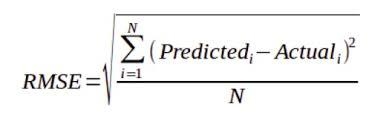

In [5]:
rmse = np.sqrt(np.mean(np.square(y_train - y_pred)))
print('Root Mean Sqared Error : ', rmse)

Root Mean Sqared Error :  35.531676008879735


### 4. Adjusting weight and bias

In [6]:
n = len(y_train)

delta_b = np.sum((y_pred - y_train)) / ((n * np.sqrt(rmse)) + eps)
delta_m = np.sum((y_pred - y_train) * X_train) / ((n * np.sqrt(rmse)) + eps)

b = b - (lr * delta_b)
m = m - (lr * delta_m)

print(f"Update factors are dalta_b : {delta_b}, delta_m:{delta_m}")
print(f"Updated values are    b    : {b},    m   :{m}")

Update factors are dalta_b : -5.4522468996626285, delta_m:-31.455270574976705
Updated values are    b    : 0.049070222096963656,    m   :0.2830974351747903


### 5. Making predictions

In [7]:
y_pred = X_test * m + b
print('X test set (Number of refills):', X_test)
print('y test set (Total cost)       :', y_train)
print('y hat      (predicted cost)   :', y_pred)

X test set (Number of refills): [10 11 12 13 14 15 16 17 18 19]
y test set (Total cost)       : [10 15 20 25 30 35 40 45 50 55]
y hat      (predicted cost)   : [2.88004457 3.16314201 3.44623944 3.72933688 4.01243431 4.29553175
 4.57862918 4.86172662 5.14482406 5.42792149]


We have very poor estimation even after making corrections in the vlaue of weight and bias. This is beacuse we need to do the steps 2,3 and 4 repeatedly untill we get the desired level of accuracy.

<strong> This process of adjusting the weight again and again is known as Gradient Descent. <strong>

## Integrating the Components

In [8]:
class LR_Model:
    def __init__(self, X_train, y_train, epoch, lr):
        
        self.x = X_train
        self.y = y_train
        self.epoch = epoch
        self.lr = lr
        
        # let m and b be zero by default
        self.m = 0
        self.b = 0
        
        # root mean squared error
        self.rmse = 0
        # empty array for storing errors
        self.error_log = np.array([])
        
        # number of data points
        self.len = len(y_train)
        
        # epsilon is usually used to denominator
        # to avoid division by zero error
        self.eps = 1e-8
    
    def for_prop(self):
        # equation of line
        self.pred = self.x*self.m + self.b
    
    def calc_rmse(self):
        # root mean squared error
        self.rmse = np.sqrt(np.mean(np.square(self.y - self.pred)))
        
        # logging the error
        self.error_log = np.append(self.error_log, self.rmse)
        
        
    def back_prop(self):
        # adjusting the weights based on the gradients calculated
        self.b -= self.lr*np.sum((self.pred - self.y)) / ((self.len * np.sqrt(self.rmse)) + self.eps)
        self.m -= self.lr*np.sum((self.pred - self.y) * self.x) / ((self.len * np.sqrt(self.rmse)) + self.eps)
        
    def train(self):
        # running the training loop
        for i in range(self.epoch):
            self.for_prop()
            self.calc_rmse()
            self.back_prop()
            print("Epoch =", i, " Error =", self.rmse)
        
    def predict(self, X_test):
        # making preditions based on the trained weight and bias
        pred = X_test*self.m + self.b
        return pred
        

## Training the Model

In [9]:
model = LR_Model(X_train, y_train, 2000, 0.009)

In [10]:
model.train()

Epoch = 0  Error = 35.531676008879735
Epoch = 1  Error = 33.99353524779957
Epoch = 2  Error = 32.49169698749663
Epoch = 3  Error = 31.026292046503887
Epoch = 4  Error = 29.59746527941352
Epoch = 5  Error = 28.205377347372963
Epoch = 6  Error = 26.85020672379595
Epoch = 7  Error = 25.5321519616801
Epoch = 8  Error = 24.25143424841227
Epoch = 9  Error = 23.008300271157264
Epoch = 10  Error = 21.80302540951643
Epoch = 11  Error = 20.635917260133464
Epoch = 12  Error = 19.507319477458626
Epoch = 13  Error = 18.41761588190134
Epoch = 14  Error = 17.36723473544795
Epoch = 15  Error = 16.356653007811545
Epoch = 16  Error = 15.386400343229756
Epoch = 17  Error = 14.457062276560084
Epoch = 18  Error = 13.56928202290797
Epoch = 19  Error = 12.723759863513777
Epoch = 20  Error = 11.921248763116838
Epoch = 21  Error = 11.16254438649743
Epoch = 22  Error = 10.448467171795535
Epoch = 23  Error = 9.779833659226274
Epoch = 24  Error = 9.157414046907972
Epoch = 25  Error = 8.581873244945331
Epoch = 26 

## Predictions and Observations

In [11]:
model.error_log

array([3.55316760e+01, 3.39935352e+01, 3.24916970e+01, ...,
       1.72868226e-02, 1.72868226e-02, 1.72868226e-02])

In [12]:
# On train data
pred = model.predict(X_train)
print('\nPredicted values :\n', pred)
print('\n Actual values :\n', y_train)
print('\n Difference between precited and actual values :\n', pred - y_train)


Predicted values :
 [10.00048515 15.0036463  20.00680745 25.00996859 30.01312974 35.01629088
 40.01945203 45.02261318 50.02577432 55.02893547]

 Actual values :
 [10 15 20 25 30 35 40 45 50 55]

 Difference between precited and actual values :
 [0.00048515 0.0036463  0.00680745 0.00996859 0.01312974 0.01629088
 0.01945203 0.02261318 0.02577432 0.02893547]


In [13]:
# On test data
pred = model.predict(X_test)
print('\nPredicted values :\n', pred)
print('\n Actual values :\n', y_test)
print('\n Difference between precited and actual values :\n', pred - y_test)


Predicted values :
 [ 60.03209662  65.03525776  70.03841891  75.04158005  80.0447412
  85.04790235  90.05106349  95.05422464 100.05738579 105.06054693]

 Actual values :
 [ 60  65  70  75  80  85  90  95 100 105]

 Difference between precited and actual values :
 [0.03209662 0.03525776 0.03841891 0.04158005 0.0447412  0.04790235
 0.05106349 0.05422464 0.05738579 0.06054693]


We can observe that the difference between the predicted values and the actual values is very small, this indicates that our LR model was able to approximate the weight and bias properly.

In [14]:
print('weight :', model.m, 'bias :', model.b)

weight : 5.003161146254522 bias : 10.000485153178367


The weight learned is close to 5 and the bias learned is close to 10.

Thus we have created our LR model the hard way from scratch successfully.
This was a simple exercise and thus the model was easily trained, but real world problem requires vigorous traing and fine tuning which will be covered in further tutorials. Hope to see you there and learn ever better stuffs.

                                                                                                               - Made with ❤️ by Dev.